# A-Star Agent

> http://ktiml.mff.cuni.cz/~bartak/AAAI2019/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
import networkx as nx
import numpy as np

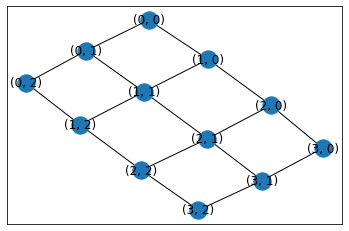

In [2]:
# dim x, y
G = nx.grid_graph(dim=[3, 4])
nx.draw_networkx(G)
plt.show()

In [3]:
path = nx.astar_path(G, (0, 0), (3, 0))

In [4]:
path

[(0, 0), (1, 0), (2, 0), (3, 0)]

In [5]:
nx.set_edge_attributes(G, 1, "cost")

In [6]:
nx.astar_path(G, (0, 0), (3, 0), weight="cost")

[(0, 0), (1, 0), (2, 0), (3, 0)]

In [7]:
G.edges(data=True)

EdgeDataView([((0, 0), (1, 0), {'cost': 1}), ((0, 0), (0, 1), {'cost': 1}), ((0, 1), (1, 1), {'cost': 1}), ((0, 1), (0, 2), {'cost': 1}), ((0, 2), (1, 2), {'cost': 1}), ((1, 0), (2, 0), {'cost': 1}), ((1, 0), (1, 1), {'cost': 1}), ((1, 1), (2, 1), {'cost': 1}), ((1, 1), (1, 2), {'cost': 1}), ((1, 2), (2, 2), {'cost': 1}), ((2, 0), (3, 0), {'cost': 1}), ((2, 0), (2, 1), {'cost': 1}), ((2, 1), (3, 1), {'cost': 1}), ((2, 1), (2, 2), {'cost': 1}), ((2, 2), (3, 2), {'cost': 1}), ((3, 0), (3, 1), {'cost': 1}), ((3, 1), (3, 2), {'cost': 1})])

In [8]:
a, b = G.edges((0,0), data=True)
print(a)
print(b)

((0, 0), (1, 0), {'cost': 1})
((0, 0), (0, 1), {'cost': 1})


In [9]:
x, y = [1, 0]
nx.set_edge_attributes(G, 1, "cost")
for u, v, d in G.edges((x, y), data=True):
    d["cost"] = 10
    print(u)
    print(v)
    print(d)

(1, 0)
(0, 0)
{'cost': 10}
(1, 0)
(2, 0)
{'cost': 10}
(1, 0)
(1, 1)
{'cost': 10}


In [10]:
nx.astar_path(G, (0, 0), (3, 0), weight="cost")

[(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0)]

In [11]:
grid = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
       ]

In [12]:
g_row, g_column = np.shape(grid)
print(g_row, g_column)

3 3


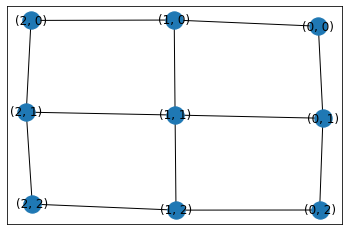

In [13]:
G = nx.grid_graph(dim=[g_row, g_column])
nx.draw_networkx(G)
nx.set_edge_attributes(G, 1, "cost")
plt.show()

# Add cost function

In [14]:
for a, b in enumerate(grid):
    for c, d in enumerate(b):
        if d == 9:
            print(a, c)
            for u, v, d in G.edges((a, c), data=True):
                d["cost"] = 10
                print(u, v)

In [15]:
a_start = (2, 0)
a_goal = (0, 2)
nx.astar_path(G, a_start, a_goal, weight="cost")

[(2, 0), (1, 0), (0, 0), (0, 1), (0, 2)]

# Del node type

In [16]:
G = nx.grid_graph(dim=[g_row, g_column])
for a, b in enumerate(grid):
    for c, d in enumerate(b):
        if d == 9:
            print(a, c)
            G.remove_node((a, c))

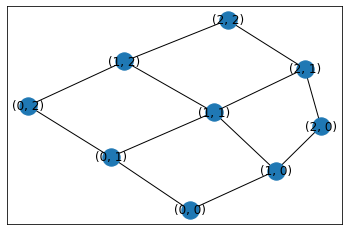

In [17]:
nx.draw_networkx(G)
plt.show()

In [18]:
G.edges(data=True)

EdgeDataView([((0, 0), (1, 0), {}), ((0, 0), (0, 1), {}), ((0, 1), (1, 1), {}), ((0, 1), (0, 2), {}), ((0, 2), (1, 2), {}), ((1, 0), (2, 0), {}), ((1, 0), (1, 1), {}), ((1, 1), (2, 1), {}), ((1, 1), (1, 2), {}), ((1, 2), (2, 2), {}), ((2, 0), (2, 1), {}), ((2, 1), (2, 2), {})])

In [19]:
a_start = (2, 0)
a_goal = (0, 2)
nx.astar_path(G, a_start, a_goal)

[(2, 0), (1, 0), (0, 0), (0, 1), (0, 2)]

In [20]:
G.clear()

# A* path generation

In [21]:
import networkx as nx
import numpy as np

def aster_path(grid, start, goal):
    g_row, g_column = np.shape(grid)
    
    # dim[x_axis, y_axis], x_axis = g_column
    G = nx.grid_graph(dim=[g_column, g_row])
    
    for _a, _b in enumerate(grid):
        for _c, _d in enumerate(_b):
            # remove obstacle node frome nodes
            if _d == 9:
                G.remove_node((_a, _c))
    
    path = nx.astar_path(G, tuple(start), tuple(goal))
    
    return [list(e) for e in path]

In [22]:
a_start = [0, 0]
a_goal = [2, 4]
grid = [
    [0, 0, 0, 0, 0],
    [9, 0, 9, 0, 9],
    [0, 0, 9, 0, 0]
       ]
path = aster_path(grid, a_start, a_goal)

In [23]:
def astar_action(path):
    a_star_path = np.array(path)
    step = 0
    if ((a_star_path[step] + [-1, 0]) == a_star_path[step+1]).all():
        return 0
    elif ((a_star_path[step] + [1, 0]) == a_star_path[step+1]).all():
        return 1
    elif ((a_star_path[step] + [0, -1]) == a_star_path[step+1]).all():
        return 2
    elif ((a_star_path[step] + [0, 1]) == a_star_path[step+1]).all():
        return 3

In [24]:
print(path)
print(astar_action(path))

for _ in path:
    print(_)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 3], [2, 3], [2, 4]]
3
[0, 0]
[0, 1]
[0, 2]
[0, 3]
[1, 3]
[2, 3]
[2, 4]


In [32]:
import networkx as nx
import numpy as np

class Astar_Agent():
    
    def __init__(self, grid, start, goal):
        
        self.grid = grid
        self.start = start
        self.goal = goal
        self.g_row, self.g_column = np.shape(self.grid)
        self.path = self.astar_path()
        self.step = 0
        self.rev_step = len(self.path)
    
    
    def dist(self, a, b):
        x1 = np.array(a, dtype=np.float32)
        x2 = np.array(b, dtype=np.float32)
        return np.linalg.norm(x1 - x2, ord=1)
        
    
    def astar_path(self):
        
        # dim[x_axis, y_axis], x_axis = g_column
        G = nx.grid_graph(dim=[self.g_column, self.g_row])
    
        for _a, _b in enumerate(self.grid):
            for _c, _d in enumerate(_b):
                # remove obstacle node frome nodes
                if _d == 9:
                    G.remove_node((_a, _c))       
        
        path = nx.astar_path(G, tuple(self.start), tuple(self.goal), heuristic=self.dist)
        self.path = [list(e) for e in path]
        return self.path

    def action(self):
        a_star_path = np.array(self.path)
        
        if((a_star_path[self.rev_step-1] == self.start)).all():
            self.step = 0
            self.rev_step = len(self.path)
           
        if self.step < len(self.path)-1:
            self.step += 1
        
            if ((a_star_path[self.step-1] + [-1, 0]) == a_star_path[self.step]).all():
                return 0
            elif ((a_star_path[self.step-1] + [1, 0]) == a_star_path[self.step]).all():
                return 1
            elif ((a_star_path[self.step-1] + [0, -1]) == a_star_path[self.step]).all():
                return 2
            elif ((a_star_path[self.step-1] + [0, 1]) == a_star_path[self.step]).all():
                return 3
        
        if self.step >= len(self.path)-1:
            self.step += 1
            self.rev_step -= 1
            if ((a_star_path[self.rev_step] + [-1, 0]) == a_star_path[self.rev_step-1]).all():
                return 0
            elif ((a_star_path[self.rev_step] + [1, 0]) == a_star_path[self.rev_step-1]).all():
                return 1
            elif ((a_star_path[self.rev_step] + [0, -1]) == a_star_path[self.rev_step-1]).all():
                return 2
            elif ((a_star_path[self.rev_step] + [0, 1]) == a_star_path[self.rev_step-1]).all():
                return 3

In [33]:
def dist(a, b):
    x1 = np.array(a, dtype=np.float32)
    x2 = np.array(b, dtype=np.float32)
    return np.linalg.norm(x1 - x2, ord=1)

In [34]:
dist([0, 0],[2, 4])

6.0

In [35]:
a_start = [0, 0]
a_goal = [2, 4]
grid = [
    [0, 9, 0, 0, 0],
    [0, 0, 0, 9, 0],
    [9, 0, 0, 9, 0]
    ]
class_test = Astar_Agent(grid, a_start, a_goal)
print(class_test.path)

[[0, 0], [1, 0], [1, 1], [1, 2], [0, 2], [0, 3], [0, 4], [1, 4], [2, 4]]


In [29]:
for _ in range(100):
    print(class_test.action())

1
3
3
0
3
3
1
1
0
0
2
2
1
2
2
0
1
3
3
0
3
3
1
1
0
0
2
2
1
2
2
0
1
3
3
0
3
3
1
1
0
0
2
2
1
2
2
0
1
3
3
0
3
3
1
1
0
0
2
2
1
2
2
0
1
3
3
0
3
3
1
1
0
0
2
2
1
2
2
0
1
3
3
0
3
3
1
1
0
0
2
2
1
2
2
0
1
3
3
0


# CBS package test

In [30]:
from cbs_mapf.planner import Planner
#planner=Planner(grid_size=1, robot_radius= 1, static_obstacles = [(1, 2), (20, 20)])
planner=Planner(grid_size=1, robot_radius= 1, static_obstacles = [(0, 0), (5, 6), (10, 20)])

In [31]:
print(planner.plan(starts=[(2, 2)],
    goals=[(8, 8)],
    debug=True))

STA*: Path found after 9 iterations
CBS_MAPF: Paths found after about 4 iterations
[[[2 2]
  [3 3]
  [4 4]
  [5 4]
  [6 4]
  [7 5]
  [8 6]
  [8 7]
  [8 8]]]
